<h1><center> 3. House Price Prediction Data Set</center></h1>

<p style='text-align: center;'> 
Jishnu Jeevan <br>
Department of Computer Science <br>
M.Tech Computer and Information Science <br>
jishnujeevan@cusat.ac.in <br>
</p>

<h2><center> Assignemt Objective</center></h2>
<p style='text-align: justify;'>
The data set contains details of different houses.<br>
The goal is to predict the house price given the different parameters.<br>
The link for the data set :<br>
<b>https://www.kaggle.com/c/house-pricesadvanced-regression-techniques/data/</b><br>
</p>

<h2>The data set contains the following columns i.e features</h2>
<p style='text-align: justify;'>
Input variables: There are 81 columns in the data set. <br>
    
Ouput variable: SalePrice
</p>

### 1. Import the required libraries

In [230]:
# For reading the data
import pandas as pd

# For mathematical operations like square root
import numpy as np

# For training, testing and splitting of the data
from sklearn.model_selection import train_test_split

# For calculating accuracy, precision and recall and confusion matrix
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

#Classification Algorithms 
from xgboost.sklearn import XGBRegressor
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV, LogisticRegression

# For plotting
import matplotlib.pyplot as plt
%matplotlib inline

### 2. Importing and displaying the data

In [231]:
# training data
train = pd.read_csv('./train.csv')

In [232]:
# Print the first few rows of training data
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [233]:
# Describe the training data
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [234]:
# Compare the shape of the two dataset
train.shape

(1460, 81)

### 3. Data preprocessing

#### 3a. Let us find out what type of data we have

In [235]:
# For training data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

#### 3b. We are going remove the Id column as it does not provide any useful information

In [236]:
# Drop id column
train.drop("Id",axis=1,inplace=True)

#### 3b. We are going to seperate the numerical and categorical data for easier perprocessing

In [237]:
# Categorical features
categorical_features = train.select_dtypes(include=['object']).columns
print(categorical_features)
print("Categorical Features : ", str(len(categorical_features)))

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')
Numerical features :  43


In [238]:
# Numerical features
numerical_features = train.select_dtypes(exclude = ["object"]).columns
print(numerical_features)
print("Numerical features : ", str(len(numerical_features)))

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')
Numerical features :  37


In [239]:
# Drop the feature 'SalePrice' from the training data as it is an output variable
y = train.SalePrice
numerical_features = numerical_features.drop("SalePrice")

In [240]:
# Now we are going to create a training data with numerical data and categorial data

# Numerical data training set
train_num = train[numerical_features]

# Categorical data training set
train_cat = train[categorical_features]

#### 3c. We are going to replace the missing values in the numerical training data with mean value

In [241]:
print("Missnig values training data (numerical) : " + str(train_num.isnull().values.sum()))

# Fill missing values with mean
train_num = train_num.fillna(train_num.mean())

print("Remaining missing values in training data (numerical) : " + str(train_num.isnull().values.sum()))

Missnig values training data (numerical) : 348
Remaining missing values in training data (numerical) : 0


#### 3d. We are going to do one hot encoding on categorical data. This will automatically take care of the missing values

In [242]:
print("Missnig values training data (categorical) : " + str(train_cat.isnull().values.sum()))

# Use one hot encoding on convert categorical data
train_cat = pd.get_dummies(train_cat)

print("Remaining missing values in training data (categorical) : " + str(train_cat.isnull().values.sum()))

Missnig values training data (categorical) : 6617
Remaining missing values in training data (categorical) : 0


#### 3e. Join the categorical and numerical data

In [243]:
train = pd.concat([train_cat,train_num],axis=1)
print(train.shape)

(1460, 288)


### 4. We are going to be splitting the dataset into training (70% of the dataset) and testing (30%)

In [244]:
X_train, X_test, y_train, y_test = train_test_split(train,y,test_size = 0.3,random_state= 0)

### 5. We are going to use different regression algorithms to predict the output of the data, and we will evaluate the accuarcy of each algorithm using root mean square error
### The algorithms we are going to use are
1. XGB Regressor
2. Linear Regression
3. RidgeCV
4. LassoCV 
5. ElasticNetCV

In [245]:
# To surpress warning messages
import warnings
warnings.filterwarnings('ignore')

# Create a dictionary to find out the best classifier using accuracy score
ranking = {}

# We are going to be using the following classifiers and doing a comparision study
regressors = {
                '1. XGB Regressor':XGBRegressor(n_estimator = 500, learning_rate = 0.5),
                '2. Linear Regression':LinearRegression(),
                '3. RidgeCV': RidgeCV(alphas = [0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60]),
                '4. LassoCV':LassoCV(cv=3, random_state = 0),           
                '5. ElasticNetCV':ElasticNetCV(random_state=0)
            }

# Take each classifier from list
for Name, regressor in regressors.items():
    # Fit the model using the training set
    regressor.fit(X_train ,y_train)
    
    # Find out the predicion using test set
    y_predicted = regressor.predict(X_test)
    
    # Find out the mean absolute error using the y test set and perdicted valur of y
    mae = metrics.mean_absolute_error(y_test, y_predicted)
    
    # Find out the mean squared error using the y test set and perdicted valur of y
    mse = metrics.mean_squared_error(y_test, y_predicted)
    
    # Find out the root mean square error using the y test set and perdicted valur of y
    rmse = np.sqrt(metrics.mean_squared_error(y_test, y_predicted))
           
    # Print results
    print("\n")
    print("Name : ", Name)
    print("Mean absolute error: ", mae)
    print("Mean square error: ", mse)
    print("Root mean square error: ", rmse)
       
    # Add the name of classifier and root mean square error to dictionary
    ranking[Name] = rmse

[21:55:58] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


Name :  1. XGB Regressor
Mean absolute error:  17961.669734589042
Mean square error:  775201192.2592031
Root mean square error:  27842.435099308448


Name :  2. Linear Regression
Mean absolute error:  22285.619155768032
Mean square error:  2715627831.6713815
Root mean square error:  52111.686133451694


Name :  3. RidgeCV
Mean absolute error:  20350.92672038166
Mean square error:  2069502213.398586
Root mean square error:  45491.78182263898


Name :  4. LassoCV
Mean absolute error:  26315.596650402007
Mean square error:  2690227422.954058
Root mean square error:  51867.40231546263


Name :  5. ElasticNetCV
Mean absolute error:  33200.20472426258
Mean square error:  3109945539.9691825
Root mean square error:  55766.885693655


### 6. The aglorithms that perform well, accorging to there accuracy (RMSE) score are as follows:



1. XGB Regressor ; 27842.435099308448
3. RidgeCV ; 45491.78182263898
4. LassoCV ; 51867.40231546263
2. Linear Regression ; 52111.686133451694
5. ElasticNetCV ; 55766.885693655


Text(0, 0.5, 'Root mean square error')

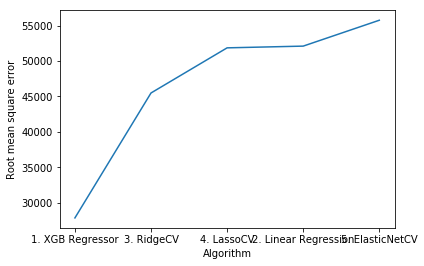

In [246]:
# Sort the dictionary 'ranking' accoriding to lowest RMSE
print("\n")
ranking_sorted = sorted(ranking.items(), key=lambda x: x[1]) # This returns a tuple, not a dictinary
algorithm_list = []
rmse_list = []
for k,v in ranking_sorted:
    print(k, ";", v)
    algorithm_list.append(k)
    rmse_list.append(v)

# PLot the RMSE
plt.plot(algorithm_list, rmse_list)
plt.xlabel('Algorithm')
plt.ylabel('Root mean square error')

### 7. The model the performs well is XGBRegressor. Now we are going to use it  on the test data

#### 7a. Loading the test data and finding the information on it.

In [247]:
# Load the test data
test = pd.read_csv("./test.csv")

# Load the actual values of test data
test_output = pd.read_csv("./sample_submission.csv")

In [248]:
# Show a few rows of test data
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [249]:
# Describe the test data
test.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [250]:
test.shape

(1459, 80)

#### 7b. We still need to do the same data preprocessing like we did for training data

#### 7b.1 Let us look at the data types

In [251]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-

#### 7b.2  Remove the column 'Id'

In [252]:
test.drop("Id",axis=1,inplace=True)
test_output.drop("Id",axis=1,inplace=True)

#### 7b.3 Seperate numerical and categorical data

In [253]:
# Categorical features
categorical_features = test.select_dtypes(include=['object']).columns
print(categorical_features)
print("Numerical features : ", str(len(categorical_features)))

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')
Numerical features :  43


In [254]:
# Numerical features
numerical_features = test.select_dtypes(exclude = ["object"]).columns
print(numerical_features)
print("Numerical features : ", str(len(numerical_features)))

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')
Numerical features :  36


In [255]:
# Now we are going to create a training data with numerical data and categorial data

# Numerical data training set
test_num = test[numerical_features]

# Categorical data training set
test_cat = test[categorical_features]

#### 7b.4 Replace missing values in numerical data with mean 

In [256]:
print("Missnig values test data (numerical) : " + str(test_num.isnull().values.sum()))

# Fill missing values with mean
test_num = test_num.fillna(test_num.mean())

print("Remaining missing values in test data (numerical) : " + str(test_num.isnull().values.sum()))

Missnig values test data (numerical) : 330
Remaining missing values in test data (numerical) : 0


#### 7b.5 Do one hot encoding on categorical values. This will take care of missing values in categorical data

In [257]:
print("Missnig values test data (categorical) : " + str(test_cat.isnull().values.sum()))

# Use one hot encoding on convert categorical data
test_cat = pd.get_dummies(test_cat)

print("Remaining missing values in training data (categorical) : " + str(test_cat.isnull().values.sum()))

Missnig values test data (categorical) : 6670
Remaining missing values in training data (categorical) : 0


#### 7b.6 Concatenate both categorical and numerical data

In [258]:
test = pd.concat([test_cat,test_num],axis=1)
print(test.shape)

(1459, 270)


#### 7c. Evaluating the XGBRegressor model

In [263]:
# Create a model
XGBR_model = XGBRegressor(n_estimator = 500, learning_rate = 0.5)

# Fit the model
# From the cell above we can see that the test set has only 270 columns, but the training set has 288 columns
# So when you train the model using the training set,
# Use only the columns in available in the test set i.e X_train[test.columns]
XGBR_model.fit(X_train[test.columns] ,y_train)
    
# Find out the predicion using test set i.e. the seperate test file
y_pred = XGBR_model.predict(test)
    
# Find out the mean absolute error using the y test set and perdicted valur of y
mae = metrics.mean_absolute_error(test_output, y_pred)
    
# Find out the mean squared error using the y test set and perdicted valur of y
mse = metrics.mean_squared_error(test_output, y_pred)
    
# Find out the root mean square error using the y test set and perdicted valur of y
rmse = np.sqrt(metrics.mean_squared_error(test_output, y_pred))

# Print results
print("\n")
print("Name : 5. XGB_regressor")
print("Mean absolute error: ", mae)
print("Mean square error: ", mse)
print("Root mean square error: ", rmse)

[22:05:24] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


Name : 5. XGB_regressor
Mean absolute error:  57193.2878129822
Mean square error:  5964854694.920161
Root mean square error:  77232.47176492645


### Conclusion: In the test set we got the root mean square erroe as : 27842.435099308448. With the test set we got root mean square error as 77232.47176492645. A difference of over 50,000. This could be due to the fact that the test data has only 270 columns while the training data has 288 columns